In [1]:
#Melakukan install feature engine
!pip install feature_engine

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.9/328.9 kB 5.5 MB/s eta 0:00:00


In [2]:
#Melakukan import data dari dari gdrive dengan
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Import library pandas untuk melakukan pengolahan dataframe
import pandas as pd


file_path = '/content/drive/MyDrive/Salary_Data.csv'

#Melakukan pengubahan dataset menjadi dataframe
df = pd.read_csv(file_path)

# Tampilkan keseluruhan dataframe
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0


In [4]:
#Melakukan identifikasi setiap kolom seperti type data kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


In [5]:
#Melakukan perhitungan nilai Nan pada setiap kolom
jumlah_nan=df.isna().sum()
print("Jumlah Nan dalam setiap kolom ")
#Menampilkan nilai Nan
print(jumlah_nan)

Jumlah Nan dalam setiap kolom 
Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64


In [6]:
#Melakukan imputasi dengan menggunakan teknik Randomsampler
from feature_engine.imputation import RandomSampleImputer
imputer=RandomSampleImputer(random_state=29)
imputer.fit(df)
df=imputer.transform(df)


In [7]:
#Menghitung nilai Nan di setiap kolom
jumlah_nan=df.isna().sum()
print("Jumlah Nan dalam setiap komputer")
print(jumlah_nan)

Jumlah Nan dalam setiap komputer
Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64


In [8]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
#Menentukan kolom target dan kolom feature
X=df['Years of Experience'].values.reshape(-1,1)
y=df['Salary'].values
#Melakukan pemisahan data train dan data test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
#Melakukan pelatihan model menggunakan Algoritma SVR
svr_model=SVR(C=1000,gamma=0.5,kernel='rbf')
svr_model.fit(X_train,y_train)
y_pred=svr_model.predict(X_test)
#Menghting nilai Mse
mse=mean_squared_error(y_test,y_pred)
print(f'Mean Squared Error:{mse}')

Mean Squared Error:767734503.8707564


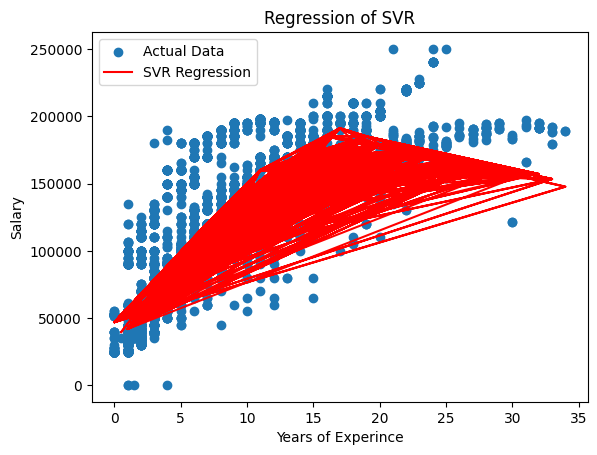

In [9]:
#Melakukan visualisasi
import matplotlib.pyplot as plt

plt.scatter(X,y,label='Actual Data')
plt.plot(X,svr_model.predict(X),color='red',label='SVR Regression')

plt.xlabel('Years of Experince')
plt.ylabel('Salary')

plt.title('Regression of SVR')

plt.legend()
plt.show()

In [10]:
from sklearn.model_selection import GridSearchCV
param_grid={
    'kernel':['rbf'],
    'C':[1000,10000,100000],
    'gamma':[0.5,0.05,0.005]
}

#Insiasialisasi Grid Seach CV
grid_search=GridSearchCV(svr_model,param_grid,cv=5)
#Melakukan pencarian grid yang terbaik
grid_search.fit(X_train,y_train)

best_params=grid_search.best_params_
print(f'Best Parameters:{best_params}')

#Mendapatkan Model terbaik
best_model=grid_search.best_estimator_
#Menguji model
y_pred=best_model.predict(X_test)

#Melakukan perhtungan nilai Mse
mse=mean_squared_error(y_test,y_pred)
print(f'Mean Squared Error on test:{mse}')

Best Parameters:{'C': 10000, 'gamma': 0.5, 'kernel': 'rbf'}
Mean Squared Error on test:755712928.4950757


In [11]:
#Melakukan pemodelan dengan menggunakan SVR setelah melakukan pencarian GridSearchCV
model_baru=SVR(C=10000,gamma=0.5,kernel='rbf')
model_baru.fit(X,y)

SVR(C=10000, gamma=0.5)

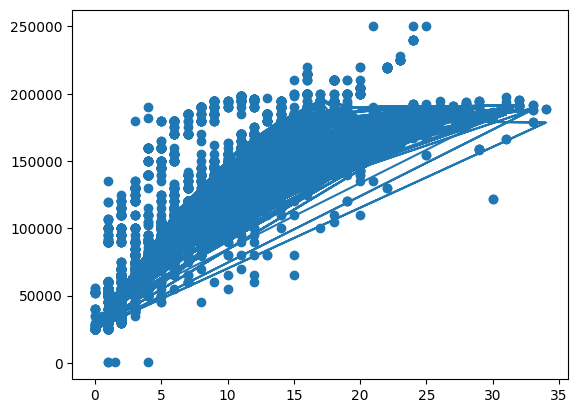

In [12]:
#Melakukan visualisasi
import matplotlib.pyplot as plt
plt.scatter(X,y)
plt.plot(X,model_baru.predict(X))